<a href="https://colab.research.google.com/github/kashishthakur26/Computer-vision-learning/blob/main/Autoencoders_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense , Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__


'2.12.0'

## Loading the dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
np.random.randint(0,59999)

5478

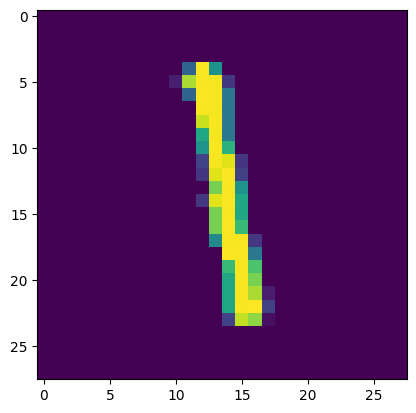

In [7]:
i = np.random.randint(0 , 59999)
plt.imshow(x_train[i])

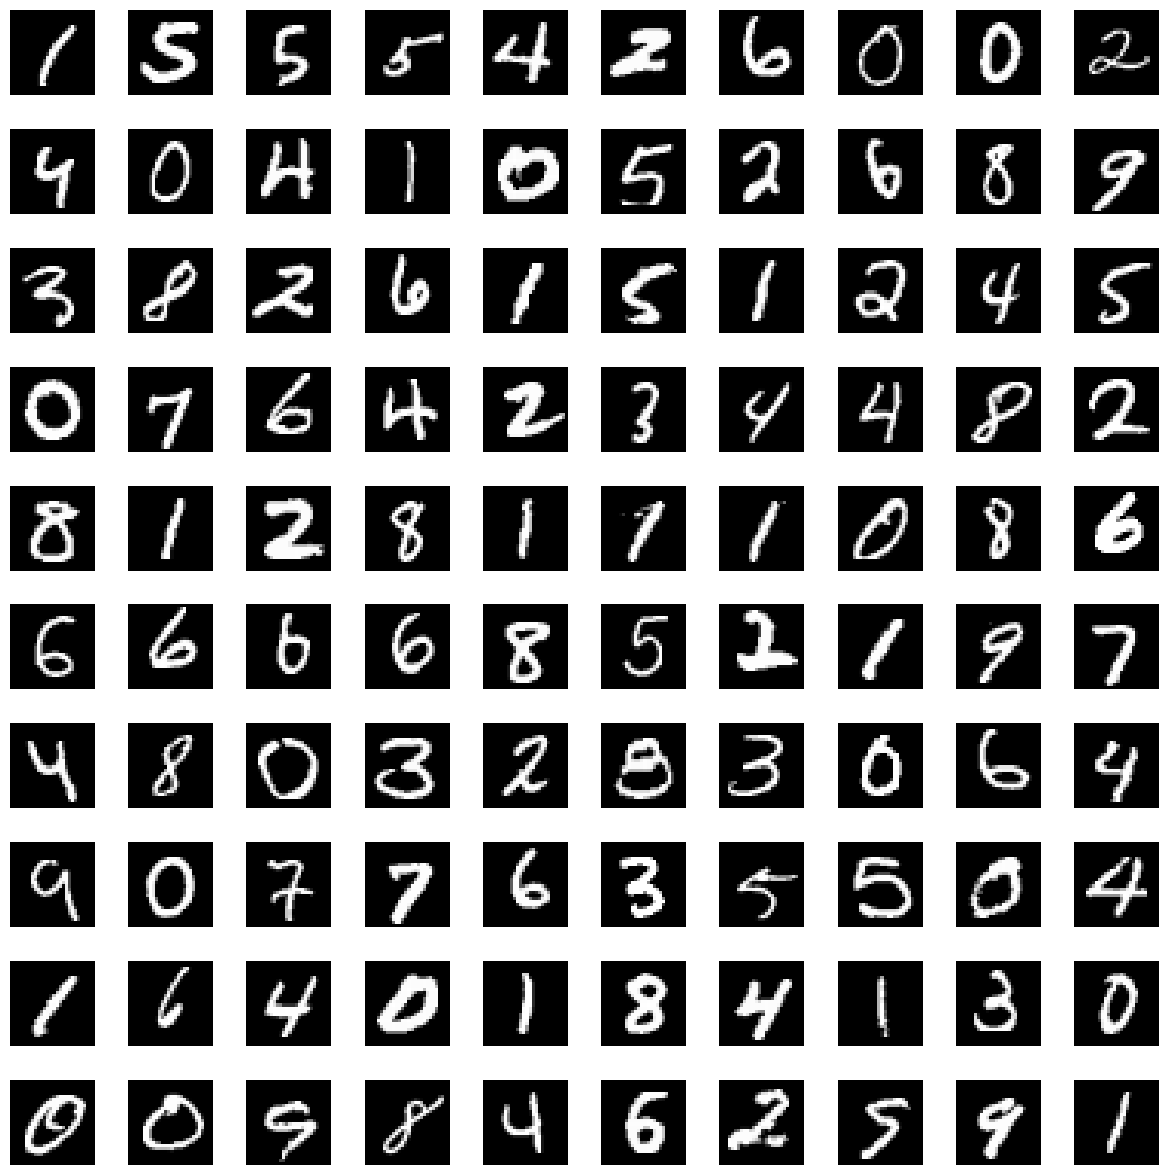

In [8]:
width = 10
height = 10

fig , axes = plt.subplots(height , width , figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0 , width * height):
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index] , cmap='gray')
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

## preprocessing the image

In [9]:
x_train[0].min(), x_train[0].max()


(0, 255)

In [10]:
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [12]:
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 28, 28)

## Building and training the autoencoder

In [ ]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder.compile(optimizer='Adam' ,loss='binary_crossentropy' , metrics = ['accuracy'])

In [ ]:
# autoencoder.fit(x_train , x_train , epochs=50)

In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [ ]:
encoder.summary()

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray');

In [ ]:
x_test[0].shape

In [ ]:
x_test[0].reshape(1, -1).shape

In [ ]:
encoded_image = encoder.predict(x_test[0].reshape(1,-1))

In [ ]:
encoded_image, encoded_image.shape

In [ ]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

## Decoding the images

In [ ]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

In [ ]:
decoded_image = decoder.predict(encoded_image)

In [ ]:
decoded_image.shape

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap = 'gray');

## ENCODING AN DECODING THE TEST IMAGES

In [ ]:
x_test.shape[0]

In [ ]:
n_images = 10
test_images = np.random.randint(0, x_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(x_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())